In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('girls.csv', sep=';')
df['ill']=(df['W']*10000/(df['L']*df['L'])<18.5)
df['ill']=df['ill'].astype(int)

In [2]:
y=df['ill']
X=df.iloc[:,5:7]
bound=int(y.shape[0]*0.7)
X_train=X[:bound]
X_test=X[bound:]
y_train=y[:bound]
y_test=y[bound:]

In [8]:
from sklearn import linear_model
clf = linear_model.SGDClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
table=pd.crosstab(y_pred,y_test)#матрица ошибок. В горизонт столбце отложены метки истинных классов
table

ill,0,1
row_0,,
0,67,115


In [4]:
# Вспомогательная функция для генерации точек на всей поверхности scatter plot
def get_grid(X, y, step=0.01):
    x_min, x_max = X.min() - 1, X.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    #print(x_min,x_max)
    return np.meshgrid(np.arange(x_min, x_max, step),
                         np.arange(y_min, y_max, step))

# Вспомогательная функция которая покрасит всё пространство
def fill_color(clf, X, y, cmap=plt.cm.RdYlBu, proba=True, step=0.01):
    xx, yy = get_grid(X[:,0], X[:,1], step)
    #if proba and hasattr(clf, 'predict_proba'):
     #   predicted = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1].reshape(xx.shape)
    #else:
    predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, predicted, cmap=cmap, alpha=.8)

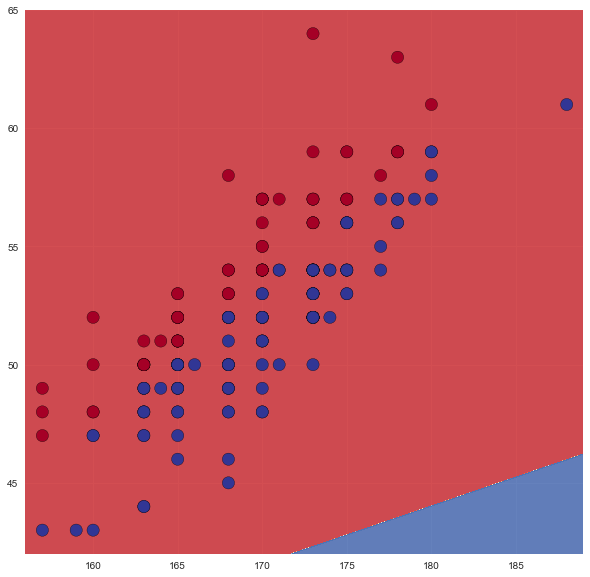

In [9]:
X_test_matr=X_test.as_matrix()
plt.figure(figsize=(10,10))
fill_color(clf, X_test_matr, y_test, cmap=plt.cm.RdYlBu)
plt.scatter(X_test_matr[:,0], X_test_matr[:,1], c=y_test, cmap=plt.cm.RdYlBu, edgecolor='black', s=150)

In [10]:
from sklearn.svm import SVC
clf = SVC(gamma='auto',kernel='linear')
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
table=pd.crosstab(y_pred,y_test)#матрица ошибок. В горизонт столбце отложены метки истинных классов
table

ill,0,1
row_0,,
0,67,0
1,0,115


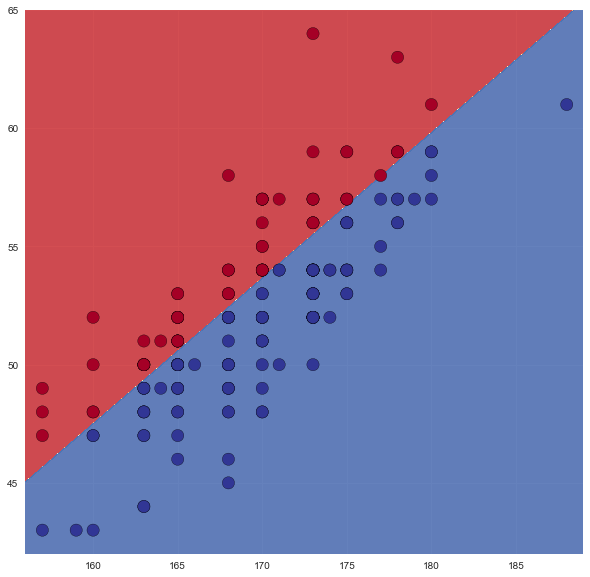

In [11]:
X_test_matr=X_test.as_matrix()
plt.figure(figsize=(10,10))
fill_color(clf, X_test_matr, y_test, cmap=plt.cm.RdYlBu)
plt.scatter(X_test_matr[:,0], X_test_matr[:,1], c=y_test, cmap=plt.cm.RdYlBu, edgecolor='black', s=150)

In [12]:
from sklearn.svm import SVC
clf = SVC(gamma='auto',kernel='rbf')
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
table=pd.crosstab(y_pred,y_test)#матрица ошибок. В горизонт столбце отложены метки истинных классов
table

ill,0,1
row_0,,
0,63,3
1,4,112


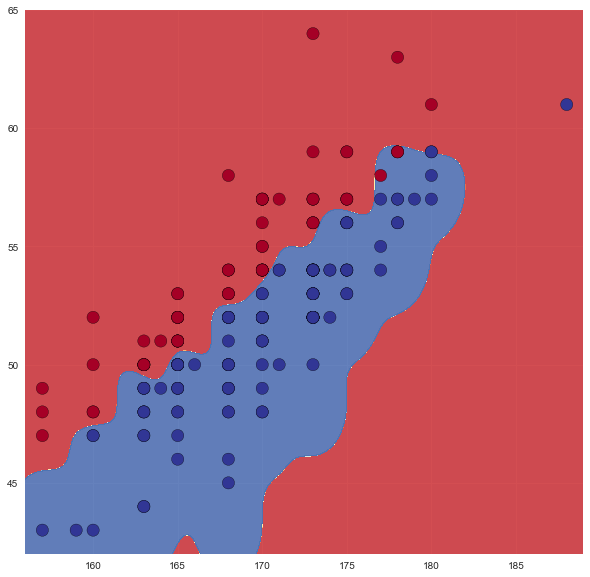

In [13]:
X_test_matr=X_test.as_matrix()
plt.figure(figsize=(10,10))
fill_color(clf, X_test_matr, y_test, cmap=plt.cm.RdYlBu)
plt.scatter(X_test_matr[:,0], X_test_matr[:,1], c=y_test, cmap=plt.cm.RdYlBu, edgecolor='black', s=150)

# Домашка

Загрузите датасет data_csv (данные о студнтах). Будем предсказывать пол по остальным признакам (выкиньте дату рождения) 

1. Создайте список моделей МО [kNN, desicion_tree,линейный классификатор,метод опорных векторов, RandomForest(хотя я на занятии его не показывал)]
2. Запустите В ЦИКЛЕ следующее: берем очередной классификатор из списка, строим по нему модель классификации, по тестовой выборке получаем значения precision и recall (запоминаем их значения)
3. После цикла найдите модель с наилучшими показателями качества. 


(Отдельное задание)
Говорят, что  RandomForest (помимо своей основной работы) может узнать информативность всех нецелевых признаков. Погуглите и напишите, как это сделать.